In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import glob
import os

In [2]:
from pathlib import Path
from keras import backend as K
from keras import layers
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
train_data_path = '../../sensix_daninhas/dataset_100x100/train'
test_data_path  = '../../sensix_daninhas/dataset_100x100/validation'

In [4]:
img_rows = 100
img_cols = 100
epochs = 300
batch_size = 32

In [5]:
num_of_train_samples = len(glob.glob(train_data_path + "/**/*" + ".jpg" , recursive=True))
num_of_test_samples  = len(glob.glob(test_data_path + "/**/*" + ".jpg"  , recursive=True))
print("Train Images : ", num_of_train_samples)
print("Test Images  : ", num_of_test_samples)

Train Images :  193
Test Images  :  43


In [6]:
train_datagen = ImageDataGenerator(rescale=1. / 255
                                  )

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [7]:
train_generator = train_datagen.flow_from_directory(train_data_path,
                                                    target_size=(img_rows, img_cols),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(test_data_path,
                                                        target_size=(img_rows, img_cols),
                                                        batch_size=batch_size,
                                                        class_mode='categorical')

Found 193 images belonging to 2 classes.
Found 43 images belonging to 2 classes.


In [8]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomContrast(factor=0.5),
    layers.experimental.preprocessing.RandomHeight(factor=0.2),
    layers.experimental.preprocessing.RandomWidth(factor=0.2)
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


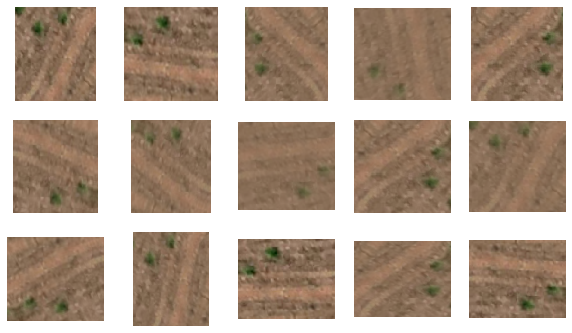

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


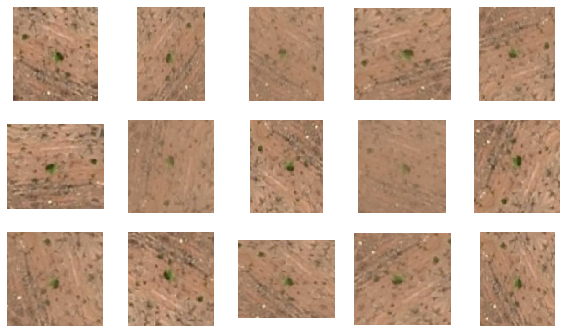

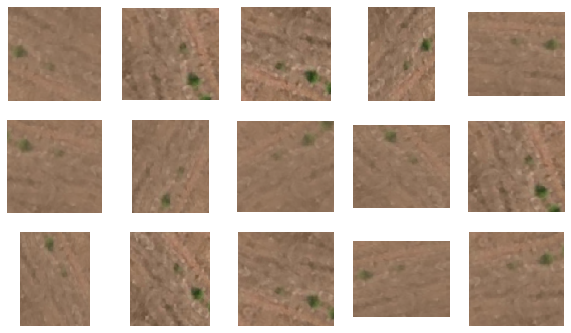

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


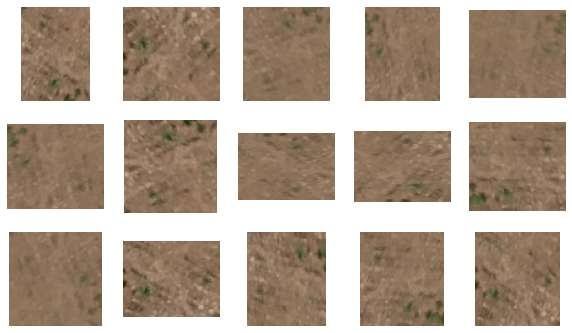

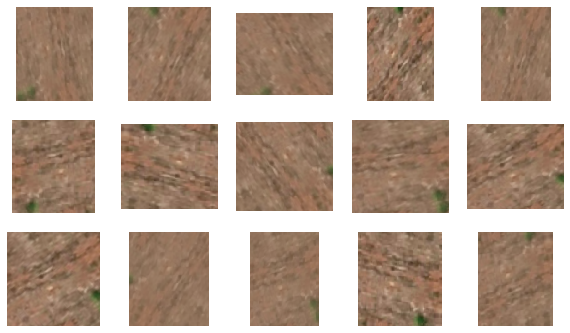

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


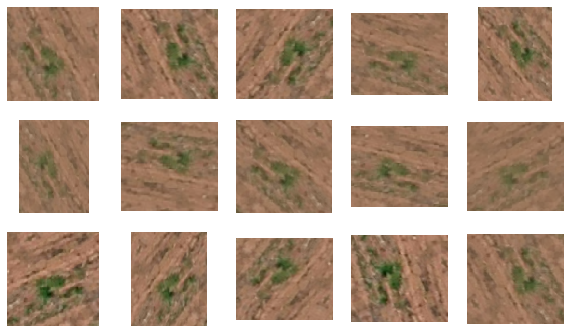

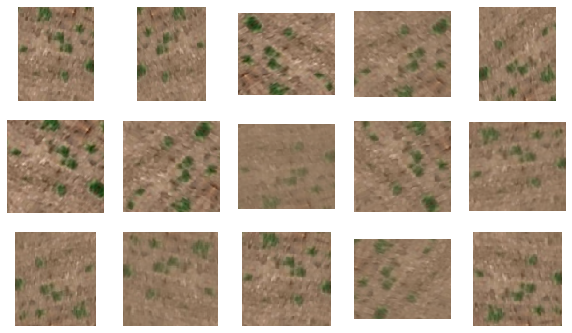

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


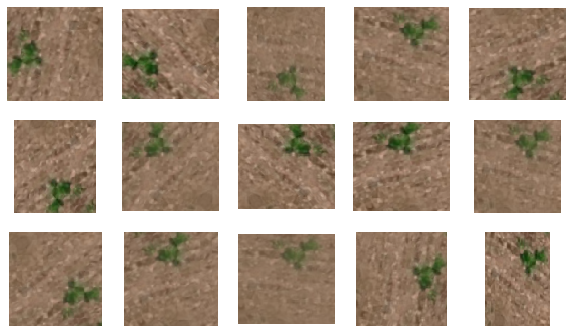

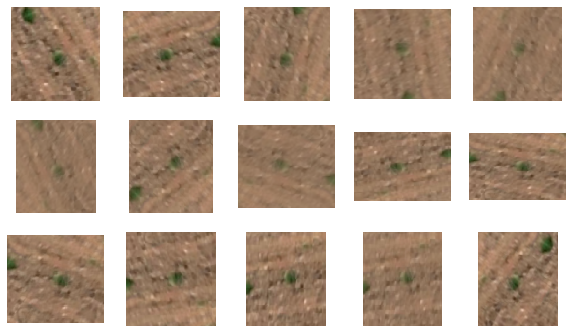

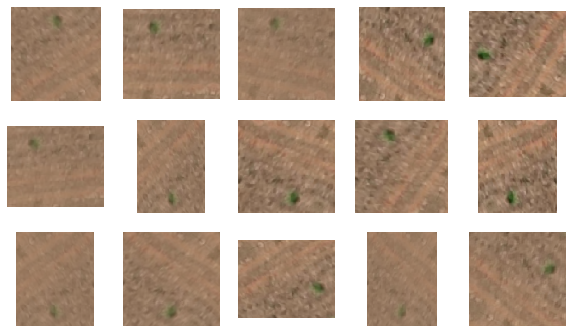

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


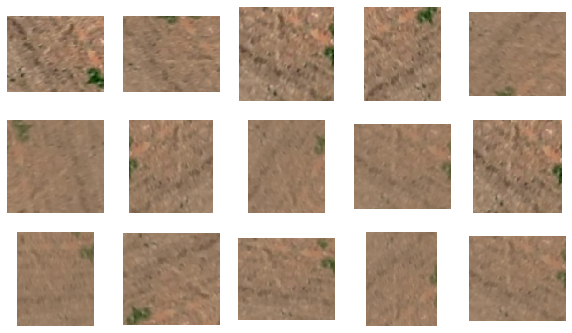

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


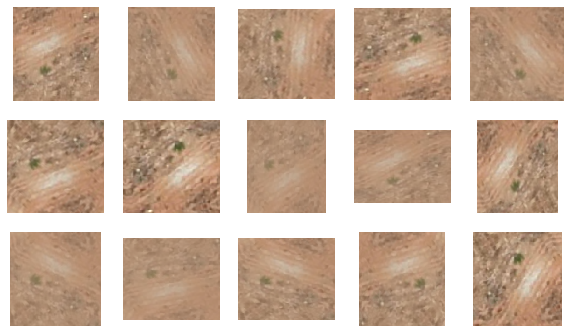

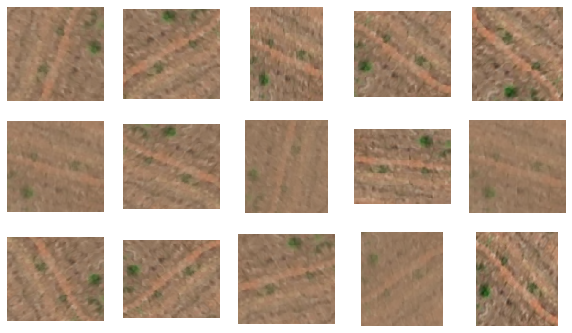

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


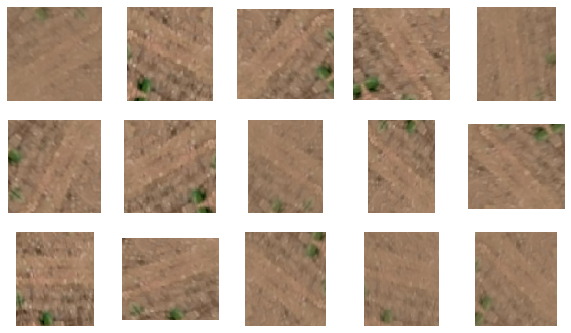

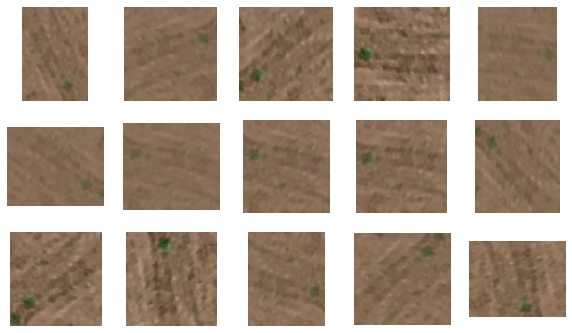

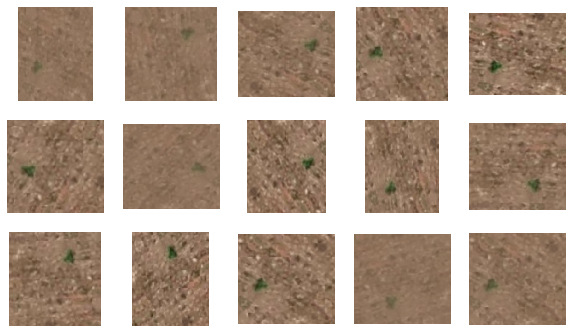

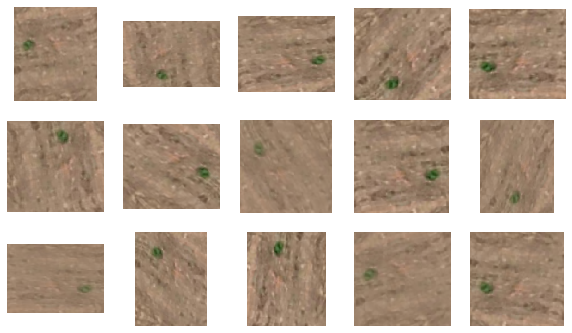

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


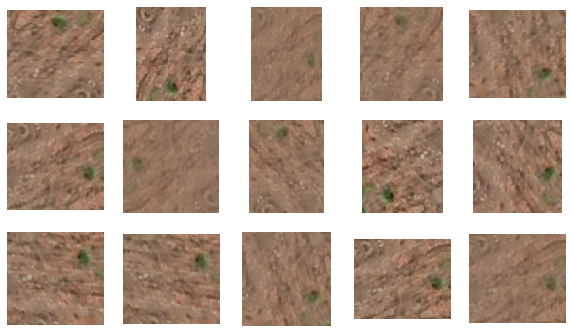

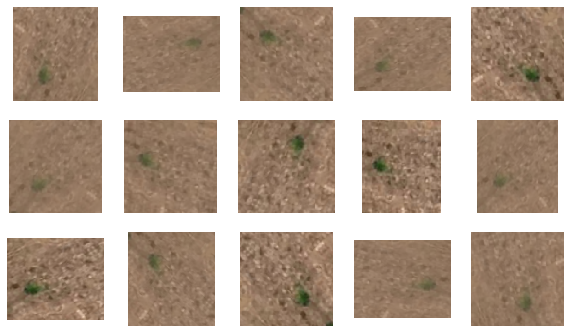

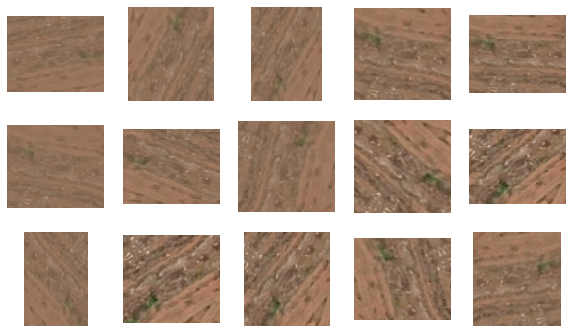

In [35]:
for m in range(20):
    plt.figure(figsize=(10, 10))
    #print("m = ", m)
    for i in range(15):
        #print("i = ", i)
        augmented_images = data_augmentation(images)
        ax = plt.subplot(5, 5, i+1)
        plt.imshow(augmented_images[m])
        plt.axis("off")
    plt.show()

In [9]:
model = Sequential()
data_augmentation,
model.add(Convolution2D(32, (3, 3), input_shape=(img_rows, img_cols, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, (3, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, (3, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [11]:
model.fit(train_generator,
                    steps_per_epoch=num_of_train_samples // batch_size,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=num_of_test_samples // batch_size)

Epoch 1/300
6/6 [==============================] - 2s 277ms/step - loss: 0.7243 - accuracy: 0.4737 - val_loss: 0.6801 - val_accuracy: 0.5312
Epoch 2/300
6/6 [==============================] - 1s 228ms/step - loss: 0.6926 - accuracy: 0.5109 - val_loss: 0.7058 - val_accuracy: 0.5000
Epoch 3/300
6/6 [==============================] - 1s 237ms/step - loss: 0.9050 - accuracy: 0.5028 - val_loss: 0.6517 - val_accuracy: 0.7812
Epoch 4/300
6/6 [==============================] - 1s 201ms/step - loss: 0.6770 - accuracy: 0.6480 - val_loss: 0.6507 - val_accuracy: 0.7500
Epoch 5/300
6/6 [==============================] - 1s 192ms/step - loss: 0.7046 - accuracy: 0.7869 - val_loss: 0.6789 - val_accuracy: 0.4688
Epoch 6/300
6/6 [==============================] - 1s 227ms/step - loss: 0.6130 - accuracy: 0.7370 - val_loss: 0.7921 - val_accuracy: 0.5312
Epoch 7/300
6/6 [==============================] - 1s 173ms/step - loss: 0.6866 - accuracy: 0.6119 - val_loss: 0.6510 - val_accuracy: 0.5312
Epoch 8/300
6

Epoch 59/300
6/6 [==============================] - 1s 212ms/step - loss: 1.1984 - accuracy: 0.7483 - val_loss: 0.5443 - val_accuracy: 0.6875
Epoch 60/300
6/6 [==============================] - 1s 185ms/step - loss: 0.3633 - accuracy: 0.8771 - val_loss: 0.3922 - val_accuracy: 0.8125
Epoch 61/300
6/6 [==============================] - 1s 175ms/step - loss: 0.3191 - accuracy: 0.8659 - val_loss: 0.5871 - val_accuracy: 0.7188
Epoch 62/300
6/6 [==============================] - 1s 222ms/step - loss: 0.3991 - accuracy: 0.8234 - val_loss: 0.5643 - val_accuracy: 0.6562
Epoch 63/300
6/6 [==============================] - 1s 209ms/step - loss: 0.3350 - accuracy: 0.8574 - val_loss: 0.4901 - val_accuracy: 0.7188
Epoch 64/300
6/6 [==============================] - 1s 178ms/step - loss: 0.3917 - accuracy: 0.8523 - val_loss: 0.4996 - val_accuracy: 0.7812
Epoch 65/300
6/6 [==============================] - 1s 181ms/step - loss: 0.3744 - accuracy: 0.8396 - val_loss: 0.5081 - val_accuracy: 0.7188
Epoch 

6/6 [==============================] - 1s 174ms/step - loss: 1.0953 - accuracy: 0.8353 - val_loss: 0.3803 - val_accuracy: 0.8438
Epoch 117/300
6/6 [==============================] - 1s 212ms/step - loss: 0.2453 - accuracy: 0.9198 - val_loss: 0.2902 - val_accuracy: 0.8750
Epoch 118/300
6/6 [==============================] - 1s 183ms/step - loss: 0.1498 - accuracy: 0.9304 - val_loss: 0.3302 - val_accuracy: 0.7812
Epoch 119/300
6/6 [==============================] - 1s 176ms/step - loss: 0.1569 - accuracy: 0.9160 - val_loss: 0.4058 - val_accuracy: 0.8125
Epoch 120/300
6/6 [==============================] - 1s 184ms/step - loss: 0.1238 - accuracy: 0.9604 - val_loss: 0.4692 - val_accuracy: 0.7500
Epoch 121/300
6/6 [==============================] - 1s 214ms/step - loss: 0.3126 - accuracy: 0.9191 - val_loss: 0.4247 - val_accuracy: 0.7500
Epoch 122/300
6/6 [==============================] - 1s 185ms/step - loss: 0.1153 - accuracy: 0.9664 - val_loss: 0.3383 - val_accuracy: 0.8125
Epoch 123/300

6/6 [==============================] - 1s 178ms/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.5806 - val_accuracy: 0.8125
Epoch 174/300
6/6 [==============================] - 1s 183ms/step - loss: 0.5111 - accuracy: 0.9570 - val_loss: 0.5835 - val_accuracy: 0.7500
Epoch 175/300
6/6 [==============================] - 1s 175ms/step - loss: 0.2625 - accuracy: 0.8892 - val_loss: 0.6520 - val_accuracy: 0.8125
Epoch 176/300
6/6 [==============================] - 1s 184ms/step - loss: 0.0828 - accuracy: 0.9738 - val_loss: 0.7561 - val_accuracy: 0.7500
Epoch 177/300
6/6 [==============================] - 1s 170ms/step - loss: 0.0738 - accuracy: 0.9824 - val_loss: 0.4988 - val_accuracy: 0.7812
Epoch 178/300
6/6 [==============================] - 1s 185ms/step - loss: 0.0347 - accuracy: 0.9953 - val_loss: 0.8530 - val_accuracy: 0.7812
Epoch 179/300
6/6 [==============================] - 1s 168ms/step - loss: 0.0240 - accuracy: 0.9945 - val_loss: 0.8374 - val_accuracy: 0.8438
Epoch 180/300

6/6 [==============================] - 1s 174ms/step - loss: 0.3363 - accuracy: 0.8956 - val_loss: 0.6492 - val_accuracy: 0.9062
Epoch 231/300
6/6 [==============================] - 1s 229ms/step - loss: 0.0874 - accuracy: 0.9702 - val_loss: 0.8088 - val_accuracy: 0.8750
Epoch 232/300
6/6 [==============================] - 1s 172ms/step - loss: 0.0378 - accuracy: 0.9965 - val_loss: 1.0204 - val_accuracy: 0.8438
Epoch 233/300
6/6 [==============================] - 1s 206ms/step - loss: 0.1457 - accuracy: 0.9400 - val_loss: 0.9797 - val_accuracy: 0.8438
Epoch 234/300
6/6 [==============================] - 1s 219ms/step - loss: 0.0466 - accuracy: 0.9956 - val_loss: 0.9989 - val_accuracy: 0.8438
Epoch 235/300
6/6 [==============================] - 1s 220ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.8217 - val_accuracy: 0.8750
Epoch 236/300
6/6 [==============================] - 1s 190ms/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 1.2191 - val_accuracy: 0.8125
Epoch 237/300

Epoch 287/300
6/6 [==============================] - 2s 301ms/step - loss: 4.8496e-04 - accuracy: 1.0000 - val_loss: 1.4134 - val_accuracy: 0.8125
Epoch 288/300
6/6 [==============================] - 2s 336ms/step - loss: 5.6049e-04 - accuracy: 1.0000 - val_loss: 1.8408 - val_accuracy: 0.8438
Epoch 289/300
6/6 [==============================] - 2s 379ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.7174 - val_accuracy: 0.8750
Epoch 290/300
6/6 [==============================] - 2s 272ms/step - loss: 4.1299e-04 - accuracy: 1.0000 - val_loss: 2.1598 - val_accuracy: 0.8125
Epoch 291/300
6/6 [==============================] - 2s 338ms/step - loss: 5.4011e-04 - accuracy: 1.0000 - val_loss: 1.6344 - val_accuracy: 0.8750
Epoch 292/300
6/6 [==============================] - 1s 291ms/step - loss: 3.5736e-04 - accuracy: 1.0000 - val_loss: 1.4038 - val_accuracy: 0.8750
Epoch 293/300
6/6 [==============================] - 1s 211ms/step - loss: 3.7070e-04 - accuracy: 1.0000 - val_loss: 1.186

In [34]:
Y_pred = model.predict(validation_generator, num_of_test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
#print(Y_pred)

In [35]:
print("Real :       ", validation_generator.classes)
print("Prediction : ", y_pred)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

Real :        [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
Prediction :  [0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 1 0
 0 1 0 1 0 1]
Confusion Matrix
[[14  7]
 [11 11]]


In [36]:
print('Classification Report')
target_names = ['daninhas', 'sem_daninhas']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

    daninhas       0.56      0.67      0.61        21
sem_daninhas       0.61      0.50      0.55        22

    accuracy                           0.58        43
   macro avg       0.59      0.58      0.58        43
weighted avg       0.59      0.58      0.58        43



In [37]:
model.save("daninhas_confusion_matrix_jp.h5")

In [38]:
image_path = '../../sensix_daninhas/dataset_100x100/validation/daninha'

images = []

for img in os.listdir(image_path):
        img = os.path.join(image_path, img)
        img = image.load_img(img, target_size=(100,100))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        processed_image = np.array(img, dtype="float") / 255.0
        images.append(processed_image)

images = np.vstack(images)

count_daninha 13
count_sem_daninha 8


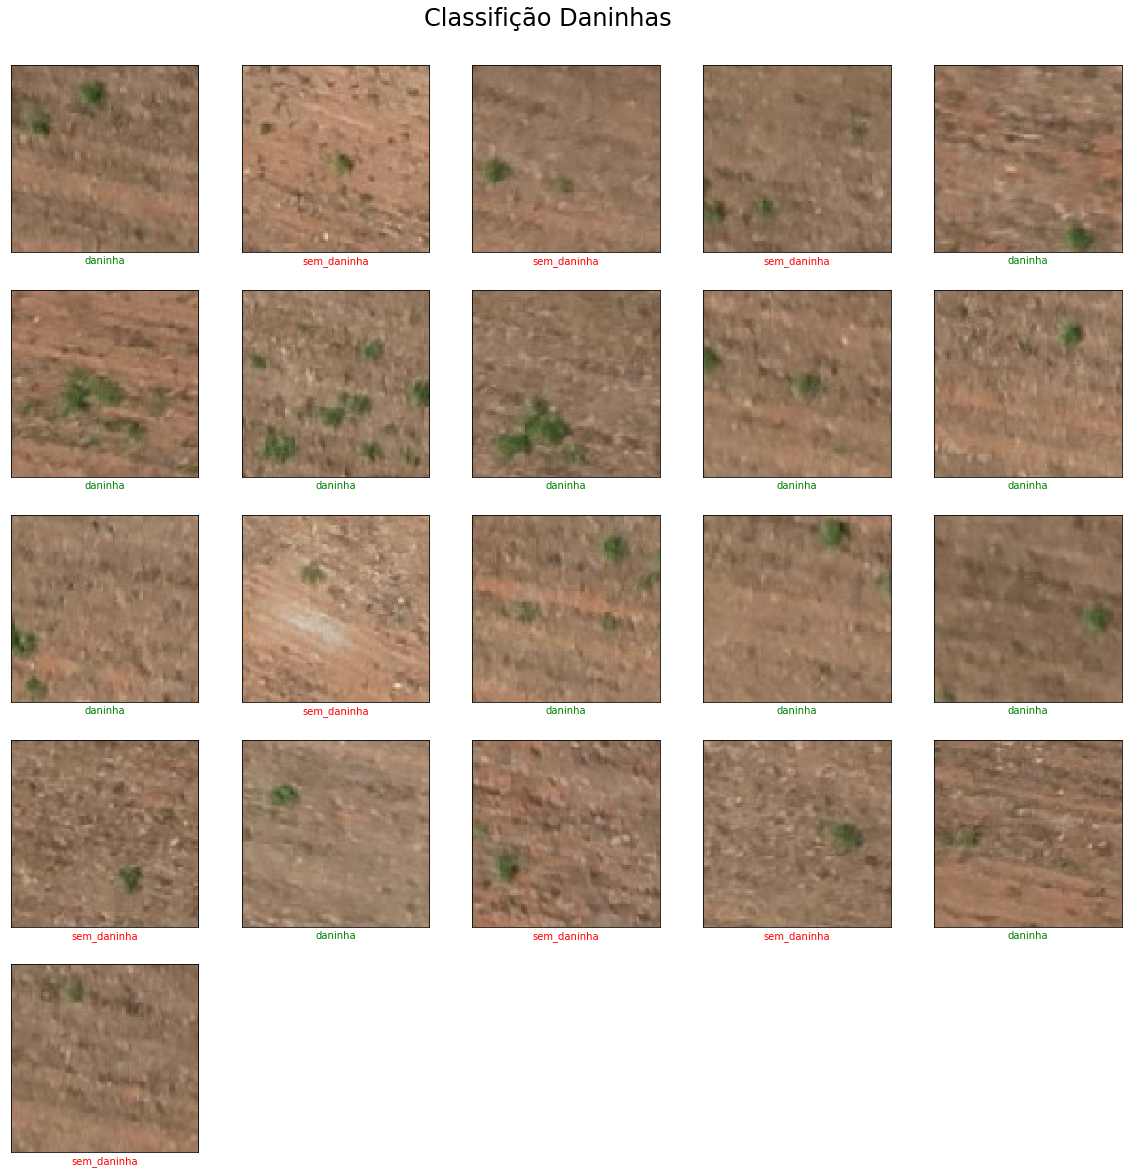

In [39]:
images_data = []
filenames = []
count_daninha = 0
count_sem_daninha = 0
count = 0

pred_result = model.predict(validation_generator, num_of_test_samples // batch_size+1)
plt.figure(figsize=(20,20))
grid_size = min(50, len(pred_result))

for filename in os.listdir(image_path):
    images_data.append(pred_result)
    filenames.append(filename)
    plt.subplot(5, 5, count+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[count], cmap=plt.cm.binary)
    if pred_result[count][0]> pred_result[count][1]:
        legend_x = plt.xlabel("daninha")
        legend_x.set_color("green")
        count_daninha = count_daninha + 1
        if count >= num_of_test_samples -1:
            break
    else :
        legend_x = plt.xlabel("sem_daninha")
        legend_x.set_color("red")
        count_sem_daninha = count_sem_daninha + 1
    count += 1

print("count_daninha", count_daninha)
print("count_sem_daninha", count_sem_daninha)
plt.suptitle('Classifição Daninhas', y = 0.92, fontsize=24)
plt.show()
#print(pred_result)
#print(pred_result[0])
#print(pred_result[0][1])
